In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("housing.csv")
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


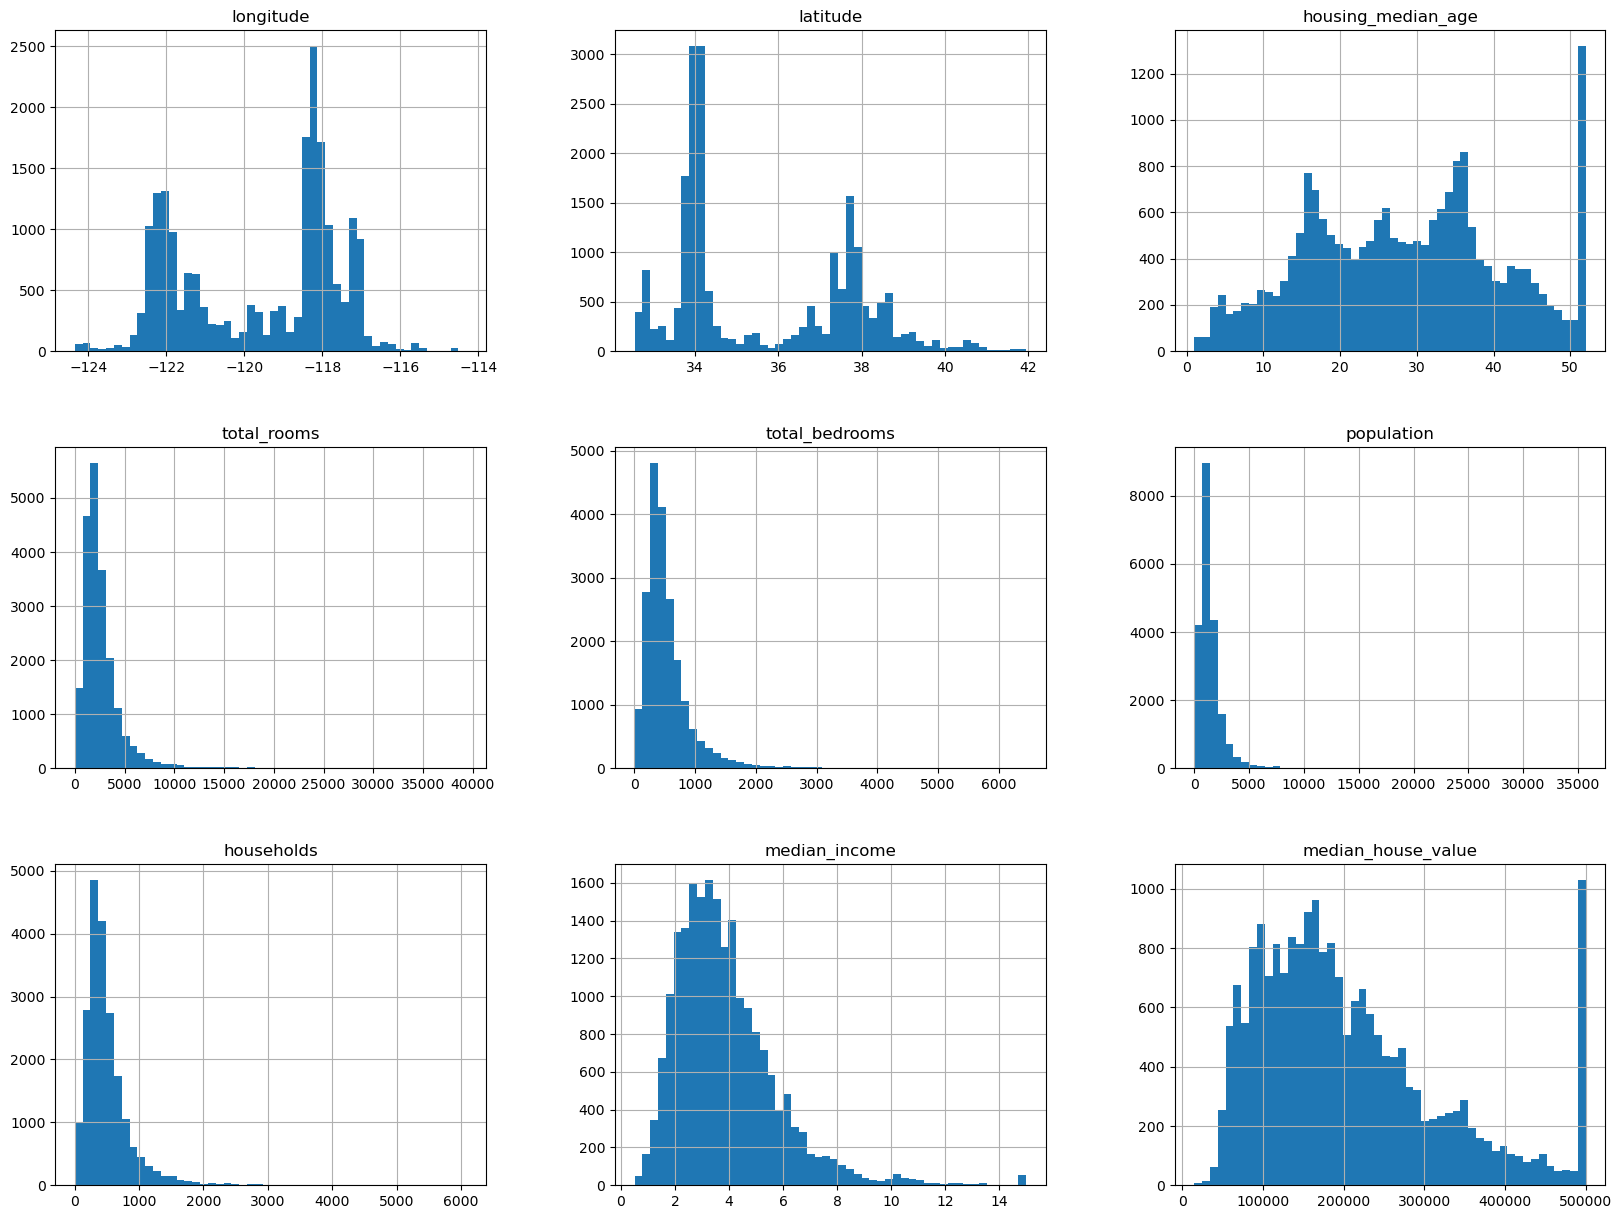

In [7]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
def split_train_test(data, test_ratio): #test_ratio это количество процентов, сколько мы хотим отделить
    shuffled_indicate = np.random.permutation(len(data))
    test_len_size = int(len(data) * test_ratio)
    test_indices = shuffled_indicate[:test_len_size]
    train_indices = shuffled_indicate[test_len_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    
train_set, test_set = split_train_test(dataset,0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [9]:
from sklearn.model_selection import train_test_split
train_set_sk, test_set_sk = train_test_split(dataset, test_size=0.2, random_state=42)
print(len(train_set_sk))
print(len(test_set_sk))

16512
4128


In [10]:
housing_with_id = dataset.reset_index() #добавление стобца индексов
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_with_id["id"] = dataset["longitude"]*1000 + dataset["latitude"] # добавление неизменяемого индекса для уникальности каждого значения
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [12]:
dataset["income_cat"] = pd.cut(dataset["median_income"], bins=[0,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5]) #разбиваем цену, чтобы при стратификации попало достаточное количество дорогих квартир а не только дешевых
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

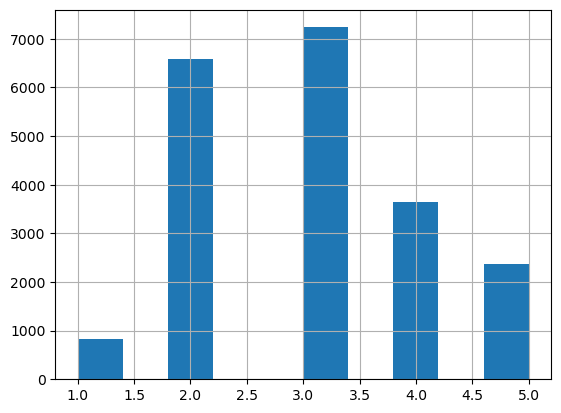

In [13]:
dataset["income_cat"].hist()

In [14]:
housing_with_id["income_test"] = pd.qcut(dataset["median_income"],5)
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_test
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,"(5.11, 15.0]"
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,"(5.11, 15.0]"
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,"(5.11, 15.0]"
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,"(5.11, 15.0]"
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,"(3.141, 3.967]"


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
housing_copy = dataset.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

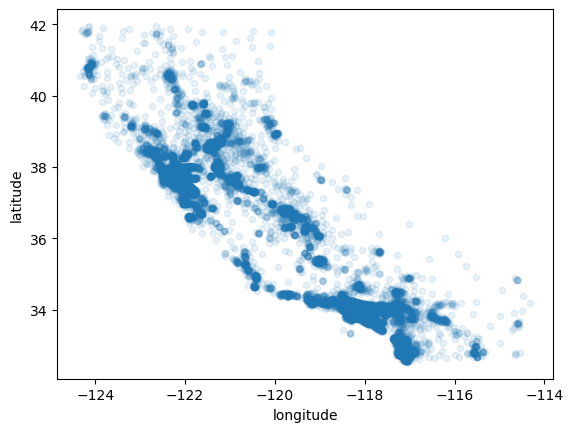

In [17]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #alpha отвечает за прозрачность точек на графике

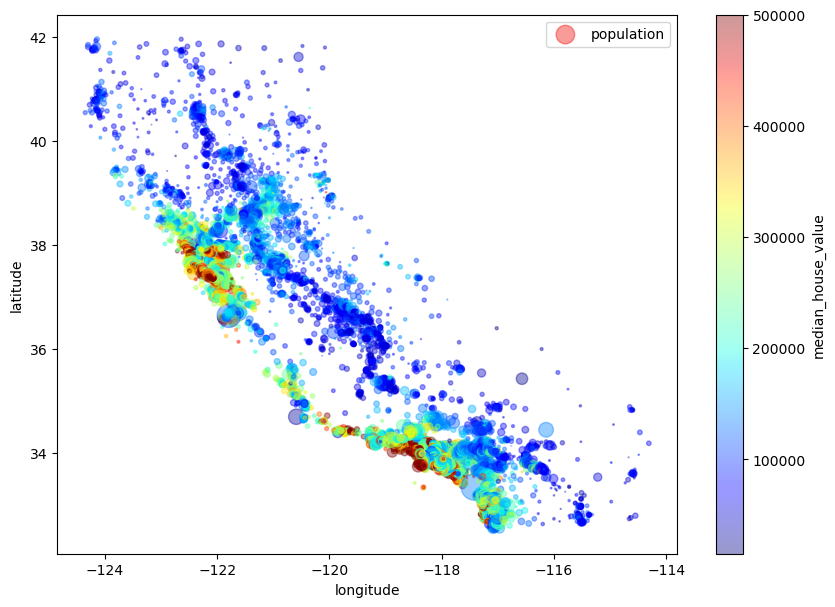

In [18]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                  s=housing_copy["population"]/100, label="population", figsize=(10,7),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                 )
plt.legend()

In [19]:
corr_matrix=housing_copy.corr(numeric_only=True)

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_

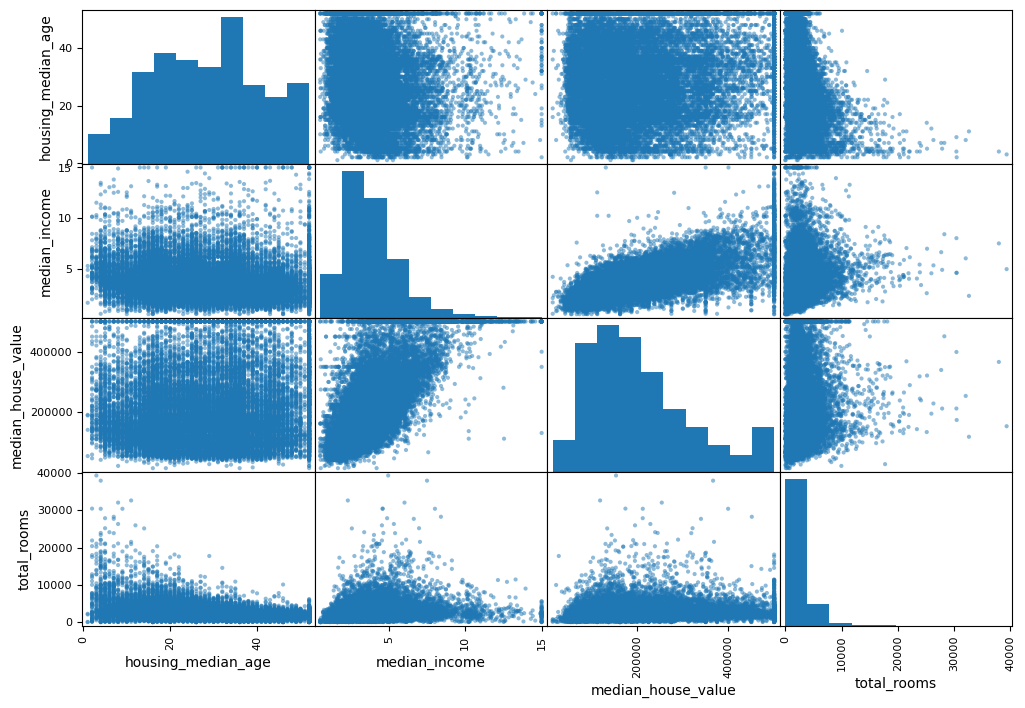

In [21]:
from pandas.plotting import scatter_matrix
attributes=["housing_median_age", "median_income", "median_house_value", "total_rooms"]
scatter_matrix(housing_copy[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

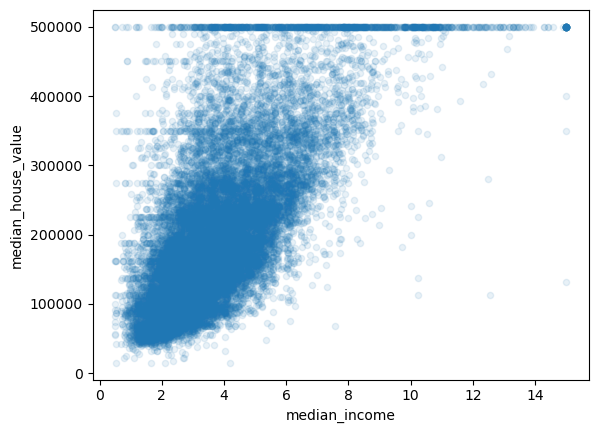

In [22]:
housing_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
housing_copy["room_per_household"]=housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedrooms_per_room"]=housing_copy["total_bedrooms"]/housing_copy["total_rooms"]
housing_copy["population_per_household"]=housing_copy["population"]/housing_copy["households"]

In [24]:
corr_matrix = housing_copy.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
room_per_household          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>

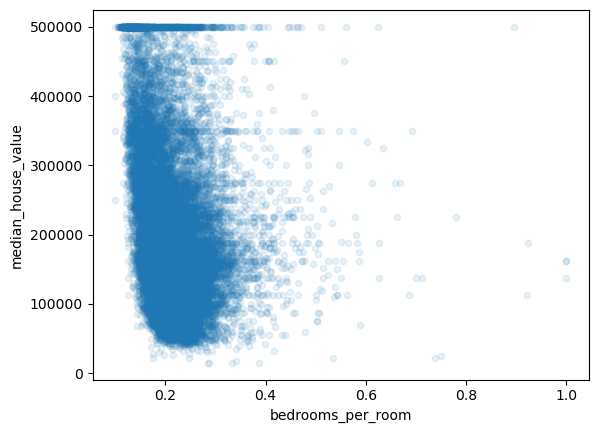

In [25]:
housing_copy.plot(kind="scatter", x="bedrooms_per_room",y="median_house_value", alpha=0.1)

In [26]:
housing = dataset.drop("median_house_value", axis=1)
housing_labels = dataset["median_house_value"].copy()

In [27]:
#варианты избавления от неизвестных параметрах в базе данных
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median() # обязательно сохранять для такой же замены в испытательном 
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\Vagant\AppData\Local\Temp\ipykernel_12164\287302259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [28]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    3.    ])

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [32]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.0


In [33]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.tail(10)

,ocean_proximity
20630,INLAND
20631,INLAND
20632,INLAND
20633,INLAND
20634,INLAND
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND
20639,INLAND


In [34]:
#преобразование текстовых данных в числа
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray() # по умолчанию выходными данными является разряжанная матрица SciPy, хранящая только позиции 1, экономля память

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ("imuter", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
from sklearn.compose import ColumnTransformer
num_attribute = list(housing_num)
cat_attribute = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribute),
    ("cat", OneHotEncoder(), cat_attribute),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Прогнозы: ", lin_reg.predict(some_data_prepared))
print("Метки: ", list(some_labels))

Прогнозы:  [405169.21758894 427774.66089518 382264.71872533 321883.16904191
 252251.39837844]
Метки:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) #т.к mse в квадратных еденицах измерения
lin_rmse # находим насколько предсказанное среднее значение отличается от действительного


np.float64(68050.96029359067)

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [55]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("Прогнозы: ", tree_reg.predict(some_data_prepared))
print("Метки: ", list(some_labels))

Прогнозы:  [452600. 358500. 352100. 341300. 342200. 269700. 299200. 241400. 226700.
 261100.]
Метки:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0]


In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,
                        housing_prepared,
                        housing_labels,
                        scoring = "neg_mean_squared_error", cv=10) #данные перемешиваются и делятся на 10 равных частей. Каждая часть по очереди становится тестовой а, 9 оставшихся- обучаюшими
tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_score(scores):
    print("Сумма оценок:", scores) # на сколько модель ошиблась
    print("Среднее:", scores.mean()) # средняя стоимость на которую ошиблись
    print("Стандартное отклонение", scores.std())

In [63]:
display_score(tree_rmse_scores)

Сумма оценок: [117700.75459661  71629.22827142  83464.87977456  74481.89302898
  88544.30955862  78465.32354853  68701.81078436  98923.54302442
  96439.80110958  72667.65532915]
Среднее: 85101.91990262302
Стандартное отклонение 14692.569899926566


In [66]:
lin_score = cross_val_score(lin_reg,
                            housing_prepared,
                            housing_labels,
                            scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_score)
display_score(lin_rmse_scores)

Сумма оценок: [84030.04436648 61955.94814265 85872.96896482 62026.55357903
 79745.34542278 69049.68875184 52980.7843383  90583.89702515
 76722.27306835 54914.9448818 ]
Среднее: 71788.24485412065
Стандартное отклонение 12755.669016934427


In [76]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [77]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18261.899371244635)

In [78]:
forest_score = cross_val_score(forest_reg,
                               housing_prepared,
                               housing_labels,
                               scoring = "neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_score)
display_score(forest_rmse_score)

Сумма оценок: [97128.24857539 47361.79537901 65263.10957428 56513.08542003
 61012.58298586 60240.30135394 47260.17925465 79198.71553622
 74434.92932848 49296.34132705]
Среднее: 63770.92887349023
Стандартное отклонение 15135.399505533709
